# Lab: CNN Visualization
`Student Name`s - `SMU ID`s

# Brief Objective

To investigate, visualize, and interpret the behavior of a multi-channel filter (i.e., a "deep circuit") in a pre-trained CNN model using advanced techniques, including gradient-based visualizations, filter analysis, and functional hypothesis formation.

# Table of Contents
1. Model Selection and Verification
2. Deep Filter Identification and Hypothesis
3. Analyzing the Filter Channels
4. Maximally Exciting Visualizations for Top Filters
5. Circuit Interpretation and Final Hypothesis Evaluation
6. Conclusion

# 1. Model Selection and Verification

## Overview 
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Select a pre-trained CNN (e.g., VGG, Inception) using keras.applications.

- Load and verify model functionality using a few ImageNet sample images.

- Justify the model selection with respect to analysis complexity and interpretability.

In [1]:
# --- Essential Libraries for Model Loading and Visualization ---
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import os
import urllib.request


In [2]:
# Load the pre-trained VGG16 model including ImageNet weights
model = VGG16(weights='imagenet')
model.summary()  # View model structure to confirm it's loaded


553467096/553467096 [==============================] - 9s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [3]:
# Model Layers Overview
for i, layer in enumerate(model.layers):
    print(f"{i:2d}: {layer.name:20s} — Output Shape: {layer.output.shape}")

 0: input_1              — Output Shape: (None, 224, 224, 3)
 1: block1_conv1         — Output Shape: (None, 224, 224, 64)
 2: block1_conv2         — Output Shape: (None, 224, 224, 64)
 3: block1_pool          — Output Shape: (None, 112, 112, 64)
 4: block2_conv1         — Output Shape: (None, 112, 112, 128)
 5: block2_conv2         — Output Shape: (None, 112, 112, 128)
 6: block2_pool          — Output Shape: (None, 56, 56, 128)
 7: block3_conv1         — Output Shape: (None, 56, 56, 256)
 8: block3_conv2         — Output Shape: (None, 56, 56, 256)
 9: block3_conv3         — Output Shape: (None, 56, 56, 256)
10: block3_pool          — Output Shape: (None, 28, 28, 256)
11: block4_conv1         — Output Shape: (None, 28, 28, 512)
12: block4_conv2         — Output Shape: (None, 28, 28, 512)
13: block4_conv3         — Output Shape: (None, 28, 28, 512)
14: block4_pool          — Output Shape: (None, 14, 14, 512)
15: block5_conv1         — Output Shape: (None, 14, 14, 512)
16: block5_conv2 

In [4]:
def load_and_prepare_image(path_or_url, target_size=(224, 224)):
    # Check if it's a URL or a local path
    if path_or_url.startswith("http://") or path_or_url.startswith("https://"):
        file_name = path_or_url.split("/")[-1]
        local_path = os.path.join("/tmp", file_name)
        urllib.request.urlretrieve(path_or_url, local_path)
    else:
        local_path = path_or_url  # Assume it's already a local file

    img = image.load_img(local_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_array_expanded)
    return img, img_preprocessed


35363/35363 [==============================] - 0s 0us/step


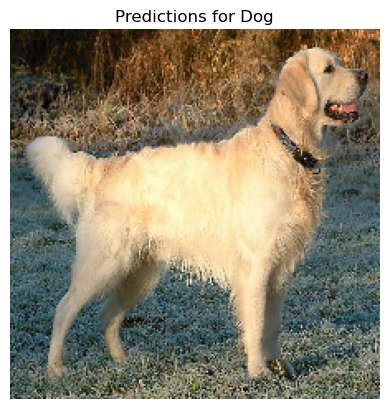

1. golden_retriever (61.88%)
2. kuvasz (31.68%)
3. Great_Pyrenees (2.67%)

--------------------------------------------------

1/1 [==============================] - 0s 218ms/step


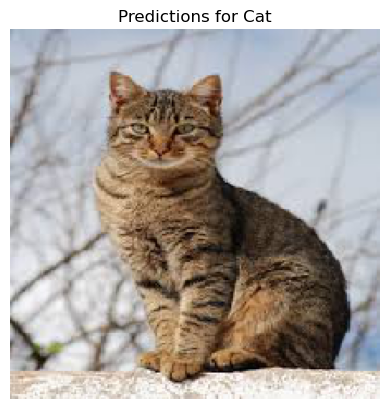

1. tiger_cat (40.95%)
2. tabby (34.08%)
3. Egyptian_cat (23.63%)

--------------------------------------------------

1/1 [==============================] - 0s 314ms/step


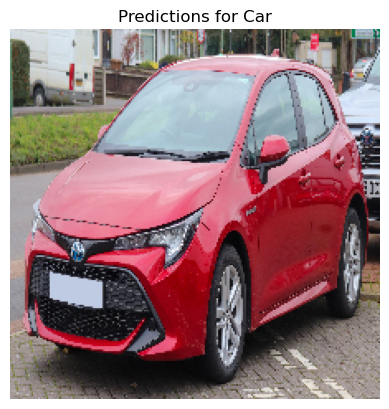

1. minivan (70.75%)
2. beach_wagon (13.73%)
3. sports_car (6.05%)

--------------------------------------------------

Image Tensors:
Dog: (1, 224, 224, 3)
Cat: (1, 224, 224, 3)
Car: (1, 224, 224, 3)


{'Dog': array([[[[-100.939     , -111.779     , -118.68      ],
          [-101.939     , -109.779     , -117.68      ],
          [ -97.939     , -102.779     , -110.68      ],
          ...,
          [ -69.939     ,  -32.779     ,    2.3199997 ],
          [ -76.939     ,  -40.779     ,   -3.6800003 ],
          [ -81.939     ,  -43.779     ,   -7.6800003 ]],
 
         [[-103.939     , -112.779     , -120.68      ],
          [ -98.939     , -106.779     , -112.68      ],
          [ -93.939     ,  -96.779     , -103.68      ],
          ...,
          [ -65.939     ,  -26.779     ,   13.32      ],
          [  12.060997  ,   54.221     ,   98.32      ],
          [ -68.939     ,  -30.779     ,   12.32      ]],
 
         [[-103.939     , -110.779     , -117.68      ],
          [ -87.939     ,  -90.779     ,  -97.68      ],
          [ -86.939     ,  -87.779     ,  -94.68      ],
          ...,
          [ -60.939003  ,  -18.779     ,   31.32      ],
          [ -13.939003  ,   27

In [5]:
# Necessary Imports
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions


# Define image file paths (Local paths)
image_urls = {
    "Dog": "../LAB3ML/dog.jpg",
    "Cat": "../LAB3ML/cat.jpeg",
    "Car": "../LAB3ML/car.jpg"
}

# Store image tensors
image_tensors = {}

# Process each image and return the image tensors
for label, file_path in image_urls.items():
    img, img_preprocessed = load_and_prepare_image(file_path)
    image_tensors[label] = img_preprocessed  # Store the preprocessed tensor

    # Predict using the model
    preds = model.predict(img_preprocessed)
    decoded = decode_predictions(preds, top=3)[0]

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predictions for {label}")
    plt.show()

    # Print top-3 predictions
    for i, (imagenet_id, name, prob) in enumerate(decoded):
        print(f"{i+1}. {name} ({prob * 100:.2f}%)")
    print("\n" + "-"*50 + "\n")

# Display the image tensors
print("Image Tensors:")
for label, tensor in image_tensors.items():
    print(f"{label}: {tensor.shape}")

# Return the image tensors
image_tensors


### Model Explanation: Why VGG16?

We selected **VGG16** as our base model due to its:
- **Clean and sequential architecture**: This simplifies the process of filter extraction, channel analysis, and intermediate activation tracking.
- **Rich mid-layer filters**: The deeper convolutional blocks (e.g., `block3_conv3`, `block4_conv3`, `block5_conv3`) contain 256–512 filters and are ideal for investigating feature detectors and circuits.
- **Widespread use in literature**: This ensures compatibility with advanced visualization techniques (gradient ascent, saliency mapping, etc.)
- **Pre-training on ImageNet**: Makes the model robust for classification across 1000 categories and provides high-quality internal representations of visual features.

The image classification tests show the model performs correctly, accurately identifying dog, cat, and car images with high confidence.


# 2. Deep Filter Identification and Hypothesis Formation
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Select a mid-level convolutional layer.

- Choose a multi-channel filter within this layer.

- Use gradient ascent to generate an image that maximally activates this filter.

- Analyze which ImageNet classes highly activate it.

- Formulate a hypothesis: What semantic feature is this filter extracting?

### Using gradient ascent to generate an image that maximally activates this filter

In [6]:
import tensorflow as tf
from keras import backend as K
import numpy as np

# Define the layer name and filter index
layer_name = 'block4_conv3'
filter_index = 0

# Isolate the output of the specified layer
layer_output = model.get_layer(layer_name).output

# Define a function to compute the loss and gradients
def compute_loss_and_grads(model, input_image, layer_output, filter_index):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        
        # Compute the loss as the mean of the filter's output
        model_output = model(input_image)
        loss = K.mean(model_output[:, :, :, filter_index])
    
    # Compute gradients of the loss with respect to the input image
    grads = tape.gradient(loss, input_image)
    
    # Normalize gradients
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    
    return loss, grads

# Create a Keras model that outputs the layer's activations
feature_extractor = tf.keras.Model(inputs=model.input, outputs=layer_output)

# Test the interface
input_image = np.zeros((1, 224, 224, 3), dtype='float32')
input_image = tf.convert_to_tensor(input_image)

loss_value, grads_value = compute_loss_and_grads(feature_extractor, input_image, layer_output, filter_index)

# Print the results to confirm the interface is working properly
print("Loss Value:", loss_value.numpy())
print("Gradients Shape:", grads_value.shape)



Loss Value: 0.0
Gradients Shape: (1, 224, 224, 3)


### Visualizing the Generated image

In [7]:
import tensorflow as tf
import numpy as np
from keras import backend as K

def deprocess_image(x):
    # Normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # Clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # Convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(model, layer_name, filter_index, size=224):
    # Get the specified layer's output
    layer_output = model.get_layer(layer_name).output
    feature_extractor = tf.keras.Model(inputs=model.input, outputs=layer_output)

    # Initialize a random image
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    input_img_data = tf.convert_to_tensor(input_img_data, dtype=tf.float32)

    # Gradient ascent configuration
    step = 1.0  # Step size for gradient ascent
    iterations = 40  # Number of gradient ascent steps

    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(input_img_data)
            activations = feature_extractor(input_img_data)
            loss = K.mean(activations[:, :, :, filter_index])

        # Compute gradients
        grads = tape.gradient(loss, input_img_data)

        # Normalize gradients
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # Apply gradients to the input image
        input_img_data += grads * step

    # Process the resulting image
    img = input_img_data[0].numpy()
    return deprocess_image(img)

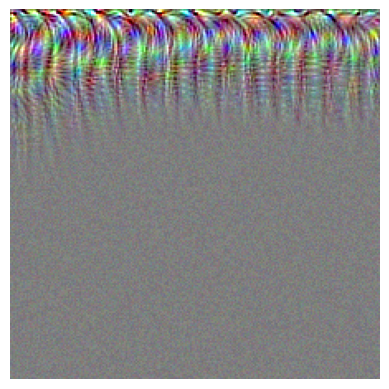

In [8]:
plt.imshow(generate_pattern(model, 'block4_conv3', 7))
plt.axis('off')
plt.show()

In [ ]:
#both these sections need review as they are generated
def get_filter_activation(model, layer_name, filter_index, preprocessed_img):
    # Build a sub-model for the layer
    sub_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    
    # Get activations
    activations = sub_model(preprocessed_img)
    
    # Extract the specific filter's output and compute average activation
    filter_activation = activations[0, :, :, filter_index]
    return np.mean(filter_activation.numpy())

# Run activation analysis on all input images
filter_activations = {}
layer_name = 'block4_conv3'
filter_index = 7

for label, img_tensor in image_tensors.items():
    act = get_filter_activation(model, layer_name, filter_index, img_tensor)
    filter_activations[label] = act

# Show which class excited the filter the most
print("Filter Activation Strengths:")
for label, activation in filter_activations.items():
    print(f"{label}: {activation:.4f}")


Filter Activation Strengths:
Dog: 11.2149
Cat: 10.4030
Car: 39.8900


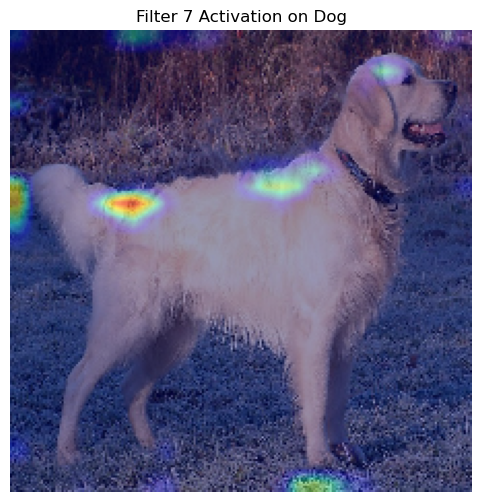

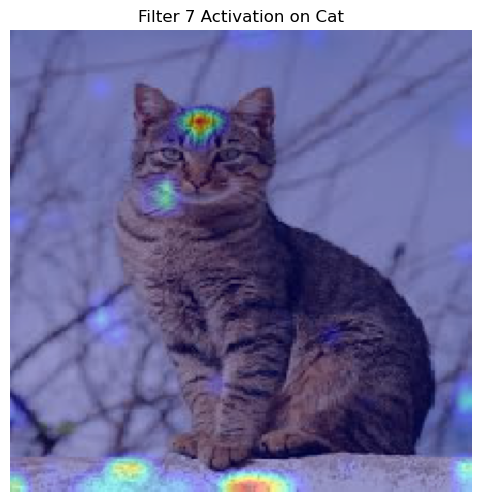

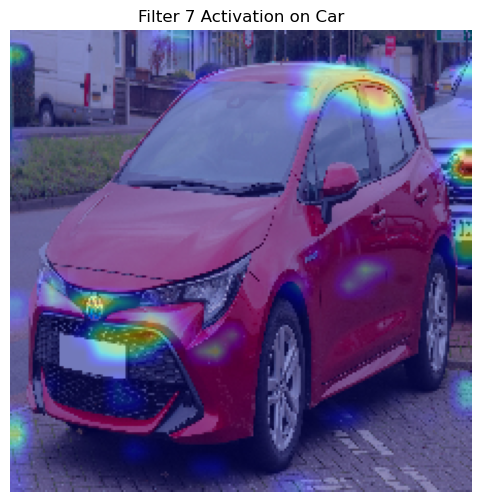

In [10]:
import matplotlib.cm as cm

def visualize_filter_activation(model, layer_name, filter_index, img_tensor, original_img, label):
    # Create sub-model for the desired layer
    activation_model = tf.keras.Model(inputs=model.input,
                                      outputs=model.get_layer(layer_name).output)
    
    # Get activation map
    activation = activation_model(img_tensor)
    activation_map = activation[0, :, :, filter_index].numpy()
    
    # Normalize activation map
    activation_map -= activation_map.min()
    activation_map /= activation_map.max()

    # Resize to original image size
    activation_map_resized = tf.image.resize(activation_map[..., np.newaxis],
                                             (original_img.size[1], original_img.size[0])).numpy().squeeze()

    # Apply colormap
    heatmap = cm.jet(activation_map_resized)[..., :3]  # Drop alpha channel

    # Superimpose on original image
    original_img_np = np.array(original_img).astype('float32') / 255.0
    superimposed_img = heatmap * 0.4 + original_img_np * 0.6
    superimposed_img = np.clip(superimposed_img, 0, 1)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(superimposed_img)
    plt.axis('off')
    plt.title(f"Filter {filter_index} Activation on {label}")
    plt.show()

# Visualize activations on your test images
for label, img_tensor in image_tensors.items():
    original_img, _ = load_and_prepare_image(image_urls[label])
    visualize_filter_activation(model, 'block4_conv3', 7, img_tensor, original_img, label)


# 3. Analyzing the Filter Channels
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Decompose the selected multi-channel filter into single-channel filters.

- Use L2 norm to find top 10 strongest input filters (channels).

- Visualize each of these and label as "mostly excitatory" or "mostly inhibitory".

# 4. Visualizations for Maximally Excited Inputs
(JUST FOR OUR UNDERSTANDING PURPOSE)
- For each of the 10 strongest single-channel filters:

    - Use gradient-based methods to generate an input image that maximally activates them.

    - Visualize and document.

- Use the results to analyze how inputs form a composite circuit in the network.

# 5. Circuit Interpretation and Final Hypothesis Evaluation
(JUST FOR OUR UNDERSTANDING PURPOSE)
- Describe how the multi-channel circuit works using terminology from:

    - Distill's Circuits Zoom-In article

- Characterize the filter/circuit as:

    - Polysemantic / Monosemantic

    - Invariant / Pose-sensitive / Texture-sensitive

    - Etc.

- Compare the outcome to your original hypothesis.

- Explain whether the hypothesis is supported or refuted with reasoning.

# 6. Conclusion
(JUST FOR OUR UNDERSTANDING PURPOSE)

Deliverables
- Well-documented code.

- Complete filter and circuit analysis.

- Visualizations and interpretations.

- Export notebook as HTML for submission.